In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import time
import importlib

In [2]:
with open("./pkls/raw_hist_list.pkl", "rb") as f:
    raw_hist_list = pickle.load(f)[1:]# length 64
with open("./pkls/ignis_mitigator_info.pkl", "rb") as f:
    ignis_mitigator_info = pickle.load(f)
with open("./pkls/delta_mitigator_info.pkl", "rb") as f:
    delta_mitigator_info = pickle.load(f)
with open("./pkls/lnp_mitigator_info.pkl", "rb") as f:
    lnp_mitigator_info = pickle.load(f)
with open("./pkls/mooney01_mitigator_info.pkl", "rb") as f:
    mooney01_mitigator_info = pickle.load(f)
with open("./pkls/mooney001_mitigator_info.pkl", "rb") as f:
    mooney001_mitigator_info = pickle.load(f)
with open("./pkls/nation_bicgstab_mitigator_info.pkl", "rb") as f:
    nation_bicgstab_mitigator_info = pickle.load(f)
with open("./pkls/nation_lu_mitigator_info.pkl", "rb") as f:
    nation_lu_mitigator_info = pickle.load(f)
with open("./pkls/mthree_iterative_mitigator_info.pkl", "rb") as f:
    mthree_iterative_mitigator_info = pickle.load(f)

In [3]:
max_size = 65
max_length = 64
ignis_length = len(ignis_mitigator_info)
nation_bicgstab_length = len(nation_bicgstab_mitigator_info)
mooney01_length = len(mooney01_mitigator_info)
mooney001_length = len(mooney001_mitigator_info)

# Expvals

In [4]:
def expval(hist):
    expval = 0
    shots = 0
    for key, count in hist.items():
        shots += count
        sigma_z = 1
        for s in key:
            if s == "1":
                sigma_z *= -1
        expval += sigma_z * count
    expval /= shots
    return expval

In [5]:
raw_expvals = [expval(hist) for hist in raw_hist_list[::2]]
ignis_expvals = [expval(ignis_mitigator_info[i]["mitigated_hist"]) for i in range(ignis_length)[::2]]
delta_expvals = [delta_mitigator_info[i]["expval"] for i in range(max_length)[::2]]
lnp_expvals = [lnp_mitigator_info[i]["expval"] for i in range(max_length)[::2]]
mooney01_expvals = [mooney01_mitigator_info[i]["expval"] for i in range(mooney01_length)[::2]]
mooney001_expvals = [mooney001_mitigator_info[i]["expval"] for i in range(mooney001_length)[::2]]
nation_bicgstab_expvals = [nation_bicgstab_mitigator_info[i]["expval"] for i in range(nation_bicgstab_length)[::2]]
nation_lu_expvals = [nation_lu_mitigator_info[i]["expval"] for i in range(max_length)[::2]]
mthree_iterative_expvals_without_sgs = [mthree_iterative_mitigator_info[i]["expval"] for i in range(max_length)[::2]]

In [6]:
delta_stddevs = [delta_mitigator_info[i]["mitigation_stddev"] for i in range(max_length)[::2]]
lnp_stddevs = [lnp_mitigator_info[i]["mitigation_stddev"] for i in range(max_length)[::2]]
nation_bicgstab_stddevs = [nation_bicgstab_mitigator_info[i]["mitigation_stddev"] for i in range(nation_bicgstab_length)[::2]]
nation_lu_stddevs = [nation_lu_mitigator_info[i]["mitigation_stddev"] for i in range(max_length)[::2]]
mthree_iterative_stddevs = [mthree_iterative_mitigator_info[i]["mitigation_stddev"] for i in range(max_length)[::2]]

In [7]:
def plot_expvals(max_size,
                 range_list,
                 corrs_list,
                 stddevs_list,
                 labels,
                 title = None,
                 xlabel = "number of qubits",
                 ylabel = "expectation value"):
    plt.clf()
    plt.style.use('ggplot')
    for i in range(len(corrs_list)):
        if corrs_list[i] is None:
            continue
        corrs = np.asarray(corrs_list[i])
        if stddevs_list[i] is not None:
            stddevs = np.asarray(stddevs_list[i])
            plt.fill_between(range_list[i], corrs - stddevs, corrs + stddevs, alpha=0.2, color="C"+str(i))
        plt.plot(range_list[i], corrs, label = labels[i], color="C"+str(i))
        # plt.errorbar(list(range(1, len(corrs_list[i]) + 1)), corrs_list[i], label=labels[i], fmt=markers[i], yerr=stddevs_list[i], capsize=3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(list(range(max_size + 2))[::5])
    plt.title(title)
    plt.show()

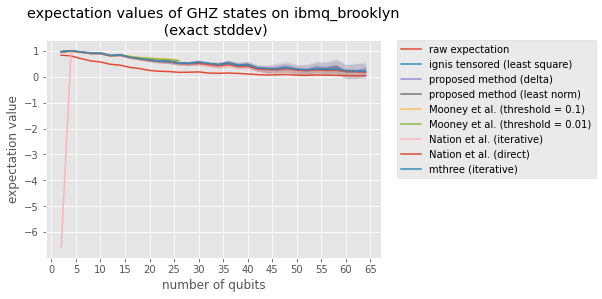

In [8]:
plot_expvals(max_size = max_size, 
             range_list = [range(2, max_length + 2)[::2], 
                           range(2, ignis_length + 2)[::2], 
                           range(2, max_length + 2)[::2], 
                           range(2, max_length + 2)[::2], 
                           range(2, mooney01_length + 2)[::2], 
                           range(2, mooney001_length + 2)[::2], 
                           range(2, nation_bicgstab_length + 2)[::2],
                           range(2, max_length + 2)[::2],
                           range(2, max_length + 2)[::2]],
             corrs_list = [raw_expvals, 
                           ignis_expvals, 
                           delta_expvals, 
                           lnp_expvals, 
                           mooney01_expvals, 
                           mooney001_expvals, 
                           nation_bicgstab_expvals,
                           nation_lu_expvals,
                           mthree_iterative_expvals_without_sgs], 
             stddevs_list = [None, 
                            None, 
                            delta_stddevs, 
                            lnp_stddevs, 
                            None, 
                            None,
                            nation_bicgstab_stddevs,
                            nation_lu_stddevs,
                            mthree_iterative_stddevs], 
             labels = ["raw expectation", 
                       "ignis tensored (least square)", 
                       "proposed method (delta)", 
                       "proposed method (least norm)", 
                       "Mooney et al. (threshold = 0.1)", 
                       "Mooney et al. (threshold = 0.01)", 
                       "Nation et al. (iterative)",
                       "Nation et al. (direct)",
                       "mthree (iterative)"],
             title = "expectation values of GHZ states on ibmq_brooklyn\n (exact stddev)")

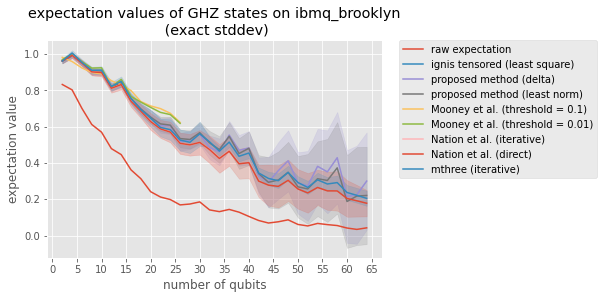

In [9]:
plot_expvals(max_size = max_size, 
             range_list = [range(2, max_length + 2)[::2], 
                           range(2, ignis_length + 2)[::2], 
                           range(2, max_length + 2)[::2], 
                           range(2, max_length + 2)[::2], 
                           range(2, mooney01_length + 2)[::2], 
                           range(2, mooney001_length + 2)[::2], 
                           range(2, nation_bicgstab_length + 2)[::2][1:],
                           range(2, max_length + 2)[::2],
                           range(2, max_length + 2)[::2]],
             corrs_list = [raw_expvals, 
                           ignis_expvals, 
                           delta_expvals, 
                           lnp_expvals, 
                           mooney01_expvals, 
                           mooney001_expvals, 
                           nation_bicgstab_expvals[1:],
                           nation_lu_expvals,
                           mthree_iterative_expvals_without_sgs], 
             stddevs_list = [None, 
                            None, 
                            delta_stddevs, 
                            lnp_stddevs, 
                            None, 
                            None,
                            nation_bicgstab_stddevs[1:],
                            nation_lu_stddevs,
                            mthree_iterative_stddevs], 
             labels = ["raw expectation", 
                       "ignis tensored (least square)", 
                       "proposed method (delta)", 
                       "proposed method (least norm)", 
                       "Mooney et al. (threshold = 0.1)", 
                       "Mooney et al. (threshold = 0.01)", 
                       "Nation et al. (iterative)",
                       "Nation et al. (direct)",
                       "mthree (iterative)"],
             title = "expectation values of GHZ states on ibmq_brooklyn\n (exact stddev)")

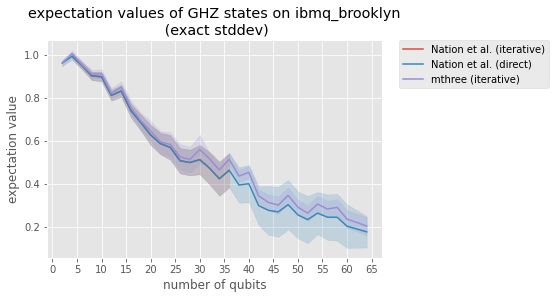

In [10]:
plot_expvals(max_size = max_size, 
             range_list = [# range(2, max_length + 2)[::2], 
                           # range(2, ignis_length + 2)[::2], 
                           # range(2, max_length + 2)[::2], 
                           # range(2, max_length + 2)[::2], 
                           # range(2, mooney01_length + 2)[::2], 
                           # range(2, mooney001_length + 2)[::2], 
                           range(2, nation_bicgstab_length + 2)[::2][1:],
                           range(2, max_length + 2)[::2],
                           range(2, max_length + 2)[::2]],
             corrs_list = [# raw_expvals, 
                           # ignis_expvals, 
                           # delta_expvals, 
                           # lnp_expvals, 
                           # mooney01_expvals, 
                           # mooney001_expvals, 
                           nation_bicgstab_expvals[1:],
                           nation_lu_expvals,
                           mthree_iterative_expvals_without_sgs], 
             stddevs_list = [# None, 
                            # None, 
                            # delta_stddevs, 
                            # lnp_stddevs, 
                            # None, 
                            # None,
                            nation_bicgstab_stddevs[1:],
                            nation_lu_stddevs,
                            mthree_iterative_stddevs], 
             labels = [# "raw expectation", 
                       # "ignis tensored (least square)", 
                       # "proposed method (delta)", 
                       # "proposed method (least norm)", 
                       # "Mooney et al. (threshold = 0.1)", 
                       # "Mooney et al. (threshold = 0.01)", 
                       "Nation et al. (iterative)",
                       "Nation et al. (direct)",
                       "mthree (iterative)"],
             title = "expectation values of GHZ states on ibmq_brooklyn\n (exact stddev)")

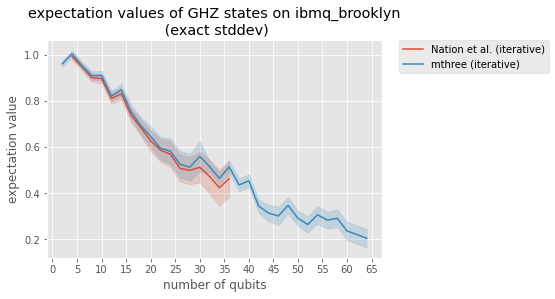

In [11]:
plot_expvals(max_size = max_size, 
             range_list = [# range(2, max_length + 2)[::2], 
                           # range(2, ignis_length + 2)[::2], 
                           # range(2, max_length + 2)[::2], 
                           # range(2, max_length + 2)[::2], 
                           # range(2, mooney01_length + 2)[::2], 
                           # range(2, mooney001_length + 2)[::2], 
                           range(2, nation_bicgstab_length + 2)[::2][1:],
                           # range(2, max_length + 2)[::2],
                           range(2, max_length + 2)[::2]],
             corrs_list = [# raw_expvals, 
                           # ignis_expvals, 
                           # delta_expvals, 
                           # lnp_expvals, 
                           # mooney01_expvals, 
                           # mooney001_expvals, 
                           nation_bicgstab_expvals[1:],
                           # nation_lu_expvals,
                           mthree_iterative_expvals_without_sgs], 
             stddevs_list = [# None, 
                            # None, 
                            # delta_stddevs, 
                            # lnp_stddevs, 
                            # None, 
                            # None,
                            nation_bicgstab_stddevs[1:],
                            # nation_lu_stddevs,
                            mthree_iterative_stddevs], 
             labels = [# "raw expectation", 
                       # "ignis tensored (least square)", 
                       # "proposed method (delta)", 
                       # "proposed method (least norm)", 
                       # "Mooney et al. (threshold = 0.1)", 
                       # "Mooney et al. (threshold = 0.01)", 
                       "Nation et al. (iterative)",
                       # "Nation et al. (direct)",
                       "mthree (iterative)"],
             title = "expectation values of GHZ states on ibmq_brooklyn\n (exact stddev)")

# expval without sgs

In [12]:
delta_x_hat = [delta_mitigator_info[i]["x_hat"] for i in range(max_length)]
lnp_x_hat = [lnp_mitigator_info[i]["x_hat"] for i in range(max_length)]
mooney01_x_hat = [mooney01_mitigator_info[i]["x_s"] for i in range(mooney01_length)]
mooney001_x_hat = [mooney001_mitigator_info[i]["x_s"] for i in range(mooney001_length)]
nation_bicgstab_x_hat = [nation_bicgstab_mitigator_info[i]["x_s"] for i in range(nation_bicgstab_length)]
nation_lu_x_hat = [nation_lu_mitigator_info[i]["x_s"] for i in range(max_length)]

In [13]:
delta_indices_to_keys_vector = [delta_mitigator_info[i]["indices_to_keys_vector"] for i in range(max_length)]
lnp_indices_to_keys_vector = [lnp_mitigator_info[i]["indices_to_keys_vector"] for i in range(max_length)]
mooney01_indices_to_keys_vector = [mooney01_mitigator_info[i]["indices_to_keys_vector"] for i in range(mooney01_length)]
mooney001_indices_to_keys_vector = [mooney001_mitigator_info[i]["indices_to_keys_vector"] for i in range(mooney001_length)]
nation_bicgstab_indices_to_keys_vector = [nation_bicgstab_mitigator_info[i]["indices_to_keys_vector"] for i in range(nation_bicgstab_length)]
nation_lu_indices_to_keys_vector = [nation_lu_mitigator_info[i]["indices_to_keys_vector"] for i in range(max_length)]

In [14]:
delta_hist_hat = [dict(zip(delta_indices_to_keys_vector[i], delta_x_hat[i])) for i in range(max_length)]
lnp_hist_hat = [dict(zip(lnp_indices_to_keys_vector[i], lnp_x_hat[i])) for i in range(max_length)]
mooney01_hist_hat = [dict(zip(mooney01_indices_to_keys_vector[i], mooney01_x_hat[i])) for i in range(mooney01_length)]
mooney001_hist_hat = [dict(zip(mooney001_indices_to_keys_vector[i], mooney001_x_hat[i])) for i in range(mooney001_length)]
nation_bicgstab_hist_hat = [dict(zip(nation_bicgstab_indices_to_keys_vector[i], nation_bicgstab_x_hat[i])) for i in range(nation_bicgstab_length)]
nation_lu_hist_hat = [dict(zip(nation_lu_indices_to_keys_vector[i], nation_lu_x_hat[i])) for i in range(max_length)]

In [15]:
delta_expvals_without_sgs = [expval(delta_hist_hat[i]) for i in range(max_length)[::2]]
lnp_expvals_without_sgs = [expval(lnp_hist_hat[i]) for i in range(max_length)[::2]]
mooney01_expvals_without_sgs = [expval(mooney01_hist_hat[i]) for i in range(mooney01_length)[::2]]
mooney001_expvals_without_sgs = [expval(mooney001_hist_hat[i]) for i in range(mooney001_length)[::2]]
nation_bicgstab_expvals_without_sgs = [expval(nation_bicgstab_hist_hat[i]) for i in range(nation_bicgstab_length)[::2]]
nation_lu_expvals_without_sgs = [expval(nation_lu_hist_hat[i]) for i in range(max_length)[::2]]

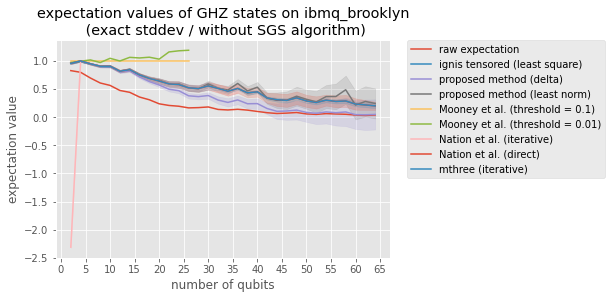

In [16]:
plot_expvals(max_size = max_size, 
             range_list = [range(2, max_length + 2)[::2], 
                           range(2, ignis_length + 2)[::2], 
                           range(2, max_length + 2)[::2], 
                           range(2, max_length + 2)[::2], 
                           range(2, mooney01_length + 2)[::2], 
                           range(2, mooney001_length + 2)[::2], 
                           range(2, nation_bicgstab_length + 2)[::2],
                           range(2, max_length + 2)[::2],
                           range(2, max_length + 2)[::2]],
             corrs_list = [raw_expvals, 
                           ignis_expvals, 
                           delta_expvals_without_sgs, 
                           lnp_expvals_without_sgs, 
                           mooney01_expvals_without_sgs, 
                           mooney001_expvals_without_sgs, 
                           nation_bicgstab_expvals_without_sgs,
                           nation_lu_expvals_without_sgs,
                           mthree_iterative_expvals_without_sgs], 
             stddevs_list = [None, 
                            None, 
                            delta_stddevs, 
                            lnp_stddevs, 
                            None, 
                            None,
                            nation_bicgstab_stddevs,
                            nation_lu_stddevs,
                            mthree_iterative_stddevs], 
             labels = ["raw expectation", 
                       "ignis tensored (least square)", 
                       "proposed method (delta)", 
                       "proposed method (least norm)", 
                       "Mooney et al. (threshold = 0.1)", 
                       "Mooney et al. (threshold = 0.01)", 
                       "Nation et al. (iterative)",
                       "Nation et al. (direct)",
                       "mthree (iterative)"],
             title = "expectation values of GHZ states on ibmq_brooklyn\n (exact stddev / without SGS algorithm)")

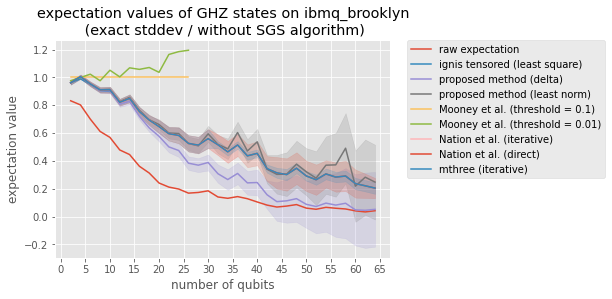

In [17]:
plot_expvals(max_size = max_size, 
             range_list = [range(2, max_length + 2)[::2], 
                           range(2, ignis_length + 2)[::2], 
                           range(2, max_length + 2)[::2], 
                           range(2, max_length + 2)[::2], 
                           range(2, mooney01_length + 2)[::2], 
                           range(2, mooney001_length + 2)[::2], 
                           range(2, nation_bicgstab_length + 2)[::2][1:],
                           range(2, max_length + 2)[::2],
                           range(2, max_length + 2)[::2]],
             corrs_list = [raw_expvals, 
                           ignis_expvals, 
                           delta_expvals_without_sgs, 
                           lnp_expvals_without_sgs, 
                           mooney01_expvals_without_sgs, 
                           mooney001_expvals_without_sgs, 
                           nation_bicgstab_expvals_without_sgs[1:],
                           nation_lu_expvals_without_sgs,
                           mthree_iterative_expvals_without_sgs], 
             stddevs_list = [None, 
                            None, 
                            delta_stddevs, 
                            lnp_stddevs, 
                            None, 
                            None,
                            nation_bicgstab_stddevs[1:],
                            nation_lu_stddevs,
                            mthree_iterative_stddevs], 
             labels = ["raw expectation", 
                       "ignis tensored (least square)", 
                       "proposed method (delta)", 
                       "proposed method (least norm)", 
                       "Mooney et al. (threshold = 0.1)", 
                       "Mooney et al. (threshold = 0.01)", 
                       "Nation et al. (iterative)",
                       "Nation et al. (direct)",
                       "mthree (iterative)"],
             title = "expectation values of GHZ states on ibmq_brooklyn\n (exact stddev / without SGS algorithm)")

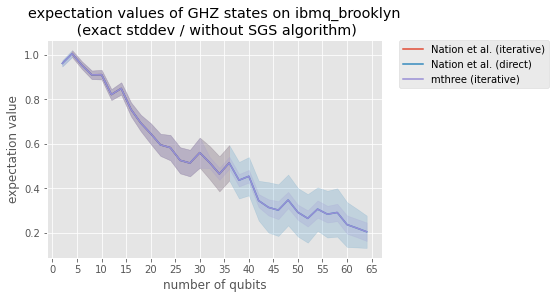

In [18]:
plot_expvals(max_size = max_size, 
             range_list = [# range(2, max_length + 2)[::2], 
                           # range(2, ignis_length + 2)[::2], 
                           # range(2, max_length + 2)[::2], 
                           # range(2, max_length + 2)[::2], 
                           # range(2, mooney01_length + 2)[::2], 
                           # range(2, mooney001_length + 2)[::2], 
                           range(2, nation_bicgstab_length + 2)[::2][1:],
                           range(2, max_length + 2)[::2],
                           range(2, max_length + 2)[::2]],
             corrs_list = [# raw_expvals, 
                           # ignis_expvals, 
                           # delta_expvals_without_sgs, 
                           # lnp_expvals_without_sgs, 
                           # mooney01_expvals_without_sgs, 
                           # mooney001_expvals_without_sgs, 
                           nation_bicgstab_expvals_without_sgs[1:],
                           nation_lu_expvals_without_sgs,
                           mthree_iterative_expvals_without_sgs], 
             stddevs_list = [# None, 
                            # None, 
                            # delta_stddevs, 
                            # lnp_stddevs, 
                            # None, 
                            # None,
                            nation_bicgstab_stddevs[1:],
                            nation_lu_stddevs,
                            mthree_iterative_stddevs], 
             labels = [# "raw expectation", 
                       # "ignis tensored (least square)", 
                       # "proposed method (delta)", 
                       # "proposed method (least norm)", 
                       # "Mooney et al. (threshold = 0.1)", 
                       # "Mooney et al. (threshold = 0.01)", 
                       "Nation et al. (iterative)",
                       "Nation et al. (direct)",
                       "mthree (iterative)"],
             title = "expectation values of GHZ states on ibmq_brooklyn\n (exact stddev / without SGS algorithm)")

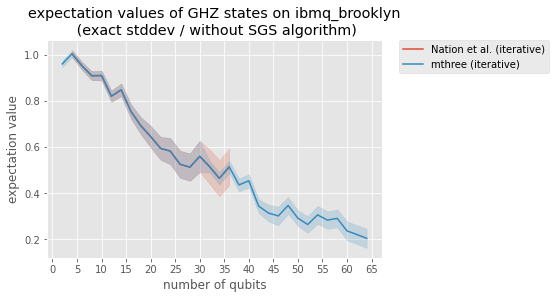

In [19]:
plot_expvals(max_size = max_size, 
             range_list = [# range(2, max_length + 2)[::2], 
                           # range(2, ignis_length + 2)[::2], 
                           # range(2, max_length + 2)[::2], 
                           # range(2, max_length + 2)[::2], 
                           # range(2, mooney01_length + 2)[::2], 
                           # range(2, mooney001_length + 2)[::2], 
                           range(2, nation_bicgstab_length + 2)[::2][1:],
                           # range(2, max_length + 2)[::2],
                           range(2, max_length + 2)[::2]],
             corrs_list = [# raw_expvals,
                           # ignis_expvals,
                           # delta_expvals_without_sgs, 
                           # lnp_expvals_without_sgs, 
                           # mooney01_expvals_without_sgs, 
                           # mooney001_expvals_without_sgs, 
                           nation_bicgstab_expvals_without_sgs[1:],
                           # nation_lu_expvals_without_sgs,
                           mthree_iterative_expvals_without_sgs], 
             stddevs_list = [# None, 
                            # None, 
                            # delta_stddevs, 
                            # lnp_stddevs, 
                            # None, 
                            # None,
                            nation_bicgstab_stddevs[1:],
                            # nation_lu_stddevs,
                            mthree_iterative_stddevs], 
             labels = [# "raw expectation", 
                       # "ignis tensored (least square)", 
                       # "proposed method (delta)", 
                       # "proposed method (least norm)", 
                       # "Mooney et al. (threshold = 0.1)", 
                       # "Mooney et al. (threshold = 0.01)", 
                       "Nation et al. (iterative)",
                       # "Nation et al. (direct)",
                       "mthree (iterative)"],
             title = "expectation values of GHZ states on ibmq_brooklyn\n (exact stddev / without SGS algorithm)")

# changing stddev (bicgstab type)

In [20]:
def stddev(mitigation_overhead, shots = 8192):
    return mitigation_overhead / np.sqrt(shots)

In [21]:
nation_bicgstab_stddevs_bicgstab = [nation_bicgstab_mitigator_info[i]["iterative_one_norm_of_inv_reduced_A"] for i in range(nation_bicgstab_length)[::2]]
nation_lu_stddevs_bicgstab = [nation_bicgstab_mitigator_info[i]["iterative_one_norm_of_inv_reduced_A"] for i in range(nation_bicgstab_length)[::2]]

In [22]:
nation_bicgstab_stddevs_lu = [nation_lu_mitigator_info[i]["iterative_one_norm_of_inv_reduced_A"] for i in range(nation_bicgstab_length)[::2]]
nation_lu_stddevs_lu = [nation_lu_mitigator_info[i]["iterative_one_norm_of_inv_reduced_A"] for i in range(max_length)[::2]]

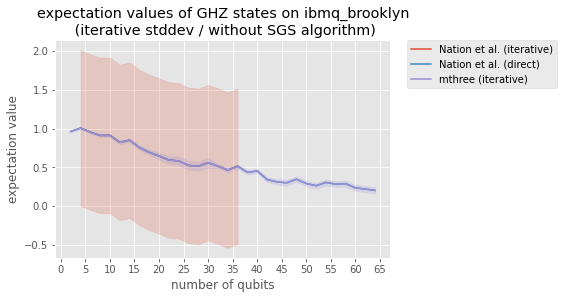

In [23]:
plot_expvals(max_size = max_size, 
             range_list = [# range(2, max_length + 2)[::2], 
                           # range(2, ignis_length + 2)[::2], 
                           # range(2, max_length + 2)[::2], 
                           # range(2, max_length + 2)[::2], 
                           # range(2, mooney01_length + 2)[::2], 
                           # range(2, mooney001_length + 2)[::2], 
                           range(2, nation_bicgstab_length + 2)[::2][1:],
                           range(2, max_length + 2)[::2],
                           range(2, max_length + 2)[::2]],
             corrs_list = [# raw_expvals, 
                           # ignis_expvals, 
                           # delta_expvals_without_sgs, 
                           # lnp_expvals_without_sgs, 
                           # mooney01_expvals_without_sgs, 
                           # mooney001_expvals_without_sgs, 
                           nation_bicgstab_expvals_without_sgs[1:],
                           nation_lu_expvals_without_sgs,
                           mthree_iterative_expvals_without_sgs], 
             stddevs_list = [# None, 
                            # None, 
                            # delta_stddevs, 
                            # lnp_stddevs, 
                            # None, 
                            # None,
                            nation_bicgstab_stddevs_bicgstab[1:],
                            None, # nation_lu_stddevs_bicgstab,
                            mthree_iterative_stddevs], 
             labels = [# "raw expectation", 
                       # "ignis tensored (least square)", 
                       # "proposed method (delta)", 
                       # "proposed method (least norm)", 
                       # "Mooney et al. (threshold = 0.1)", 
                       # "Mooney et al. (threshold = 0.01)", 
                       "Nation et al. (iterative)",
                       "Nation et al. (direct)",
                       "mthree (iterative)"],
             title = "expectation values of GHZ states on ibmq_brooklyn\n (iterative stddev / without SGS algorithm)")

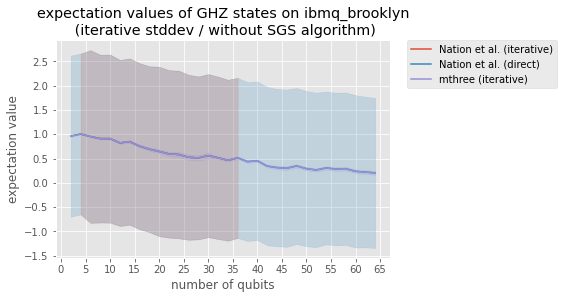

In [24]:
plot_expvals(max_size = max_size, 
             range_list = [# range(2, max_length + 2)[::2], 
                           # range(2, ignis_length + 2)[::2], 
                           # range(2, max_length + 2)[::2], 
                           # range(2, max_length + 2)[::2], 
                           # range(2, mooney01_length + 2)[::2], 
                           # range(2, mooney001_length + 2)[::2], 
                           range(2, nation_bicgstab_length + 2)[::2][1:],
                           range(2, max_length + 2)[::2],
                           range(2, max_length + 2)[::2]],
             corrs_list = [# raw_expvals, 
                           # ignis_expvals, 
                           # delta_expvals_without_sgs, 
                           # lnp_expvals_without_sgs, 
                           # mooney01_expvals_without_sgs, 
                           # mooney001_expvals_without_sgs, 
                           nation_bicgstab_expvals_without_sgs[1:],
                           nation_lu_expvals_without_sgs,
                           mthree_iterative_expvals_without_sgs], 
             stddevs_list = [# None, 
                            # None, 
                            # delta_stddevs, 
                            # lnp_stddevs, 
                            # None, 
                            # None,
                            nation_bicgstab_stddevs_lu[1:],
                            nation_lu_stddevs_lu,
                            mthree_iterative_stddevs], 
             labels = [# "raw expectation", 
                       # "ignis tensored (least square)", 
                       # "proposed method (delta)", 
                       # "proposed method (least norm)", 
                       # "Mooney et al. (threshold = 0.1)", 
                       # "Mooney et al. (threshold = 0.01)", 
                       "Nation et al. (iterative)",
                       "Nation et al. (direct)",
                       "mthree (iterative)"],
             title = "expectation values of GHZ states on ibmq_brooklyn\n (iterative stddev / without SGS algorithm)")